### Logistic Regression with ROC and ROC AUC curve

In [2]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
X,y=make_classification(n_classes=2,n_samples=1000,random_state=10)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [10]:
# in logistic regression threshold value is 0.5
# this threshold can change as per different domain

#Create dummy model
'''In Python, the underscore _ is a naming convention used to represent a "throwaway" variable.

When you write [0 for _ in range(len(y_test))], you are telling 
Python: "Run this loop for every item in y_test, but I don't actually need to use the value of the index (0, 1, 2...) inside the loop."'''
dummy_model_prob=[0 for _ in range(len(y_test))]


In [11]:
#Creating model
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
model_prob=model.predict_proba(X_test)
model_prob=model_prob[:,1]# probability of outcome to be one


In [ ]:
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc) #0.5 bcoz only in 50 percent case model match eg: 0(y) and 0.12(model_prob) 
print(model_auc)#0.92 bcoz only in 92 percent case model match eg: 1(y) and 0.92(model_prob) 

0.5
0.9272767857142857


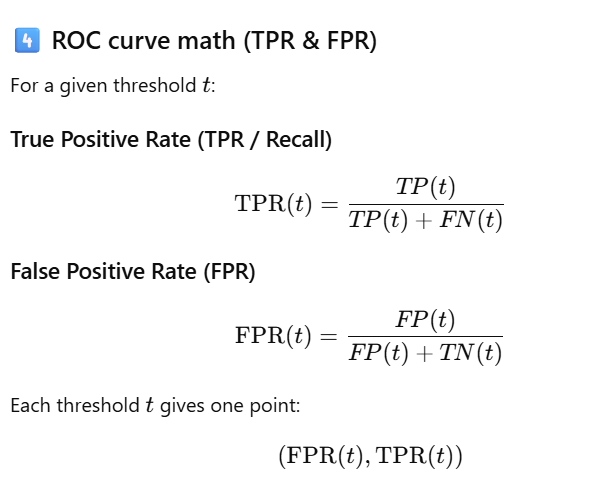

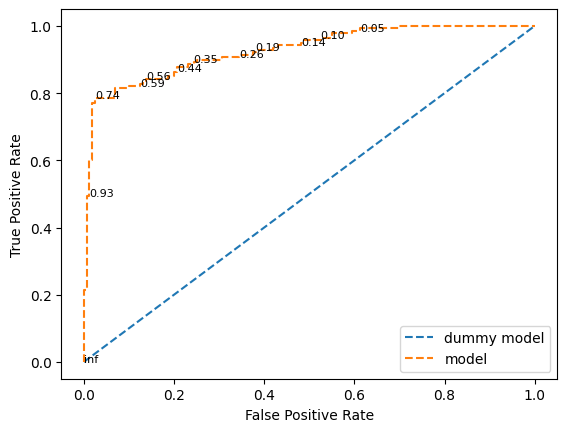

In [41]:
# ROC curve plots True Positive Rate (TPR) against False Positive Rate (FPR)
# Each point on the ROC curve corresponds to a different decision threshold

# Thresholds are derived from the model's predicted probabilities (unique sorted scores)
#y_score  = [0.90, 0.80, 0.40, 0.30, 0.10]
#[∞, 0.90, 0.80, 0.40, 0.30, 0.10] and ∞ everything predicted is 0

# Changing the threshold changes the confusion matrix, resulting in different TPR and FPR values


# ROC curve tells at every threshold what will be true positive and false positive 
dummy_fpr,dummy_tpr,thresholds=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds=roc_curve(y_test,model_prob)
from matplotlib import pyplot as plt
plt.plot(dummy_fpr,dummy_tpr,linestyle="--",label="dummy model")
plt.plot(model_fpr,model_tpr,linestyle="--",label="model")
step = 5
for i in range(0, len(thresholds), step):
    plt.text(model_fpr[i], model_tpr[i], f"{thresholds[i]:.2f}", fontsize=8)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()

There is a specific probabilistic meaning to the AUC value that is very helpful for your Logistic Regression project:

The AUC represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

If AUC = 0.90: If you pick one random person from "Class A" and one from "Class B," there is a 90% chance your model will give a higher probability score to the correct person.